Machine Learning
=====

##### Important concepts
* ENG - Electrical Number Group - a grouping used to divide product into rough categories.
* ETIM class - a grouping used to divide products into detailed categories.
* Technical description - a text field describing each product.

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import scipy.sparse as sp
from stop_words import get_stop_words
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC
from collections import Counter

%config InlineBackend.figure_format = 'retina'

# Change working directory to get the file
os.chdir('/Users/pkg/Springboard')

# Open pickled file from the data wrangling section and set working directory
with open('data_wrangling.pickle', 'rb') as handle:
    df = pickle.load(handle)
    
os.chdir('/Users/pkg/Springboard/Intermediate Data Science with Python/Python_Capstone')

In [2]:
# Sort by df by ETIM_classes for the clf.predict_proba-method later
df = df.sort_values(['ETIM_class', 'ENG'], ascending=True)

In [3]:
# Separating the labels from the rest of the data set
labels = df['ETIM_class']
ex_var = df[['ENG', 'Technical_description']]

# Display some attributes of the dataset
print("labels'  shape:", labels.shape)
print("ex_var's shape:", ex_var.shape)
print("")
print("labels is of type", type(labels))
print("ex_var is of type", type(ex_var))
print("")
print("first label after sorting:", labels.iloc[0])
print("first ENG after sorting:", ex_var.iloc[0,0])
print("first technical description after sorting:", ex_var.iloc[0,1])

labels'  shape: (202216,)
ex_var's shape: (202216, 2)

labels is of type <class 'pandas.core.series.Series'>
ex_var is of type <class 'pandas.core.frame.DataFrame'>

first label after sorting: EC000001
first ENG after sorting: 11
first technical description after sorting: Direkte tilkoblingsklemmer Al/Cu 70/300mm2,sett à 4 stk. L1/L2/L3/PEN


In [4]:
# Importing stop words that will be ignored
stop_words = get_stop_words('norwegian')

# Creating a Pandas Series of the technical descriptions
text = df['Technical_description']

# Creating the corpus
vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1,2), min_df=2)

# Build the vocabulary
vectorizer.fit(text)

# Convert text to a bag of words, returns a Compressed Sparse Row matrix
# This is suitable for a matrix that is primarily made up of zeroes.
x = vectorizer.transform(text)

In [5]:
# Setting up X and y
X = x
y = labels

# Create the test and training sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=99)

In [6]:
# Train the classifier over the training set, and test on the test set
clf = MultinomialNB(alpha=0.0000000001).fit(xtrain, ytrain)
NB_train_accuracy = clf.score(xtrain, ytrain)
NB_test_accuracy = clf.score(xtest, ytest)

# Accuracy scores for both the training and test sets
print("Training accuracy:", round(NB_train_accuracy, 2))
print("Testing accuracy", round(NB_test_accuracy, 2))

Training accuracy: 0.9
Testing accuracy 0.84


In [7]:
# Creating the classification report
y_pred_train = clf.predict(xtrain)
y_pred_test = clf.predict(xtest)

# print(classification_report(y_pred_train, ytrain))
print(classification_report(y_pred_test, ytest))

/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

    EC000001       0.82      0.65      0.73        49
    EC000003       0.93      0.97      0.95       143
    EC000005       0.99      0.98      0.99       149
    EC000006       0.00      0.00      0.00         0
    EC000007       0.90      0.98      0.93       294
    EC000008       0.17      1.00      0.29         1
    EC000009       0.50      1.00      0.67         1
    EC000010       0.90      0.85      0.87        73
    EC000011       0.92      0.93      0.93       127
    EC000012       0.85      0.97      0.91        91
    EC000013       1.00      1.00      1.00         2
    EC000014       0.50      0.83      0.62         6
    EC000016       1.00      0.92      0.96        12
    EC000017       0.89      1.00      0.94         8
    EC000018       0.85      0.89      0.87       193
    EC000019       0.91      0.96      0.93        67
    EC000020       0.00      0.00      0.00         1
    EC000022       0.88    

In [8]:
# Results when dummies are included

#               precision    recall  f1-score   support
#    micro avg       0.84      0.84      0.84     50554
#    macro avg       0.66      0.68      0.65     50554
# weighted avg       0.85      0.84      0.83     50554

In [9]:
# Creating technical description to be evaluated by the model
text = 'dimmer'

example = clf.predict_proba(vectorizer.transform([text])).flatten()

In [10]:
test = clf.predict(vectorizer.transform([text]))
test[0]

'EC001744'

In [11]:
example_dict = dict(zip(sorted(ytrain.unique()), example))
#example_dict

In [12]:
# Just for comparison - to be deleted
#i = iter(range(len(example)))
#example_dict = dict(zip(i, example))
#example_dict

In [13]:
top5 = {k: example_dict[k] for k in sorted(example_dict, key=example_dict.__getitem__, reverse=True)[:5]}
print(top5)
sorted(example_dict, key=example_dict.__getitem__, reverse=True)[:5]

{'EC001744': 0.20987080851972142, 'EC000025': 0.19697617181854982, 'EC002710': 0.12423120593071767, 'EC002706': 0.069734923591760034, 'EC001094': 0.044266738890940675}


['EC001744', 'EC000025', 'EC002710', 'EC002706', 'EC001094']

In [14]:
print(labels.unique().shape, len(list(example_dict.values())))

(1814,) 1771


In [15]:
len(ytrain.unique())

1771

In [16]:
sorted(ytrain.unique())

['EC000001',
 'EC000003',
 'EC000005',
 'EC000006',
 'EC000007',
 'EC000008',
 'EC000009',
 'EC000010',
 'EC000011',
 'EC000012',
 'EC000013',
 'EC000014',
 'EC000016',
 'EC000017',
 'EC000018',
 'EC000019',
 'EC000020',
 'EC000022',
 'EC000023',
 'EC000024',
 'EC000025',
 'EC000026',
 'EC000028',
 'EC000029',
 'EC000030',
 'EC000032',
 'EC000033',
 'EC000034',
 'EC000035',
 'EC000036',
 'EC000037',
 'EC000038',
 'EC000040',
 'EC000041',
 'EC000042',
 'EC000044',
 'EC000045',
 'EC000046',
 'EC000047',
 'EC000048',
 'EC000050',
 'EC000051',
 'EC000052',
 'EC000054',
 'EC000055',
 'EC000058',
 'EC000059',
 'EC000060',
 'EC000061',
 'EC000062',
 'EC000064',
 'EC000065',
 'EC000066',
 'EC000067',
 'EC000068',
 'EC000069',
 'EC000070',
 'EC000071',
 'EC000073',
 'EC000074',
 'EC000075',
 'EC000078',
 'EC000079',
 'EC000080',
 'EC000082',
 'EC000083',
 'EC000085',
 'EC000086',
 'EC000087',
 'EC000088',
 'EC000089',
 'EC000090',
 'EC000091',
 'EC000092',
 'EC000093',
 'EC000094',
 'EC000096',

In [17]:
test2 = list(clf.predict_log_proba(vectorizer.transform([text])).flatten())

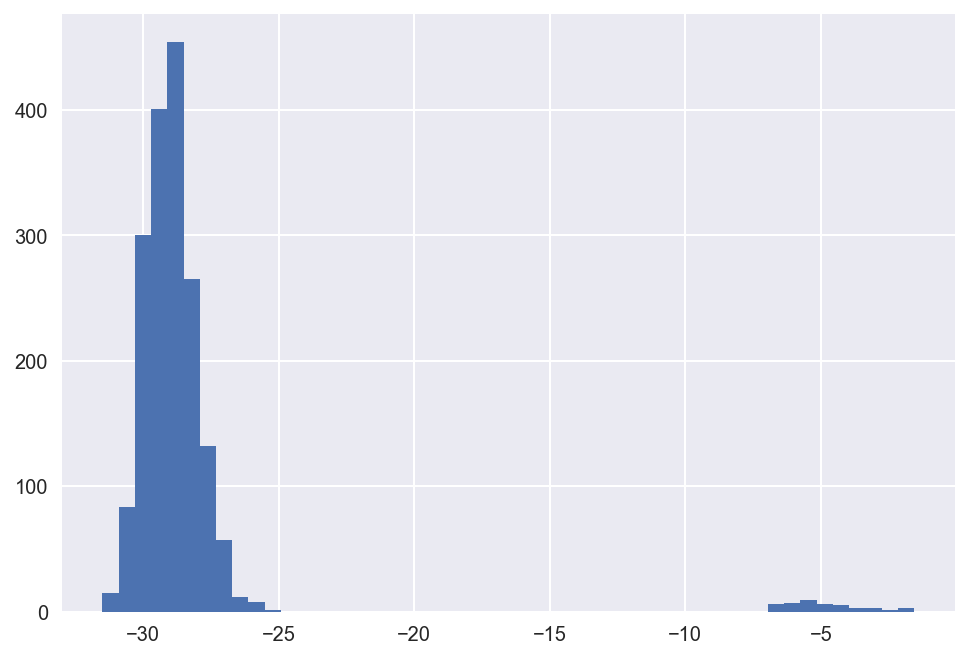

In [18]:
plt.hist(test2, bins=50)
plt.show()

In [19]:
'''
# Random undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
'''

'\n# Random undersampling\nrus = RandomUnderSampler(random_state=0)\nX_resampled, y_resampled = rus.fit_resample(X, y)\nprint(sorted(Counter(y_resampled).items()))\n'

In [20]:
'''
# SMOTE
smo = SMOTE(random_state=0)
X_resampled, y_resampled = smo.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
'''

'\n# SMOTE\nsmo = SMOTE(random_state=0)\nX_resampled, y_resampled = smo.fit_resample(X, y)\nprint(sorted(Counter(y_resampled).items()))\n'

In [21]:
'''
# Even if the k_neighbors is solved, type may be an issue (prefers numpy arrays)
print(type(X), type(y))
'''

'\n# Even if the k_neighbors is solved, type may be an issue (prefers numpy arrays)\nprint(type(X), type(y))\n'

In [22]:
'''
# ADASYN
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
'''

'\n# ADASYN\nada = ADASYN()\nX_resampled, y_resampled = ada.fit_resample(X, y)\nprint(sorted(Counter(y_resampled).items()))\n'

In [23]:
import sys
def sizeof_fmt(num, suffix='b'):
    ''' By Fred Cirera, after https://stackoverflow.com/a/1094933/1870254'''
    for unit in ['',' K',' M',' G',' T',' P',' E',' Z']:
        if abs(num) < 1024.0:
            return "%3.1f%s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name,value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name,sizeof_fmt(size)))

                            df: 114.6 Mb
                        ex_var:  98.3 Mb
                        labels:  27.8 Mb
                             y:  27.8 Mb
                        ytrain:  18.4 Mb
                         ytest:   6.9 Mb
                  y_pred_train:   4.6 Mb
                   y_pred_test:   1.5 Mb
                  example_dict:  72.1 Kb
                           _16:  15.7 Kb


In [24]:
'''
# Find which ETIM_classes are rare
ETIM_counts = df['ETIM_class'].value_counts()

# Last ETIM-class with more than 15 products
print((ETIM_counts > 15)[1046])
print((ETIM_counts > 15)[1047])

ETIM_counts_index = np.array(ETIM_counts[0:1046].index)

# Create boolean array which indicates which products that belong to an ETIM-class
# that occurs more than 15 times
keep_EC = []

for i in range(len(df)):
    if df['ETIM_class'].iloc[i] in ETIM_counts_index:
        keep_EC.append(1)
    else:
        keep_EC.append(0)

keep_EC = np.array(keep_EC, dtype='bool')

# Keep only those products that belong to an ETIM-class that occurs more than 15 times
df = df[keep_EC]
'''

"\n# Find which ETIM_classes are rare\nETIM_counts = df['ETIM_class'].value_counts()\n\n# Last ETIM-class with more than 15 products\nprint((ETIM_counts > 15)[1046])\nprint((ETIM_counts > 15)[1047])\n\nETIM_counts_index = np.array(ETIM_counts[0:1046].index)\n\n# Create boolean array which indicates which products that belong to an ETIM-class\n# that occurs more than 15 times\nkeep_EC = []\n\nfor i in range(len(df)):\n    if df['ETIM_class'].iloc[i] in ETIM_counts_index:\n        keep_EC.append(1)\n    else:\n        keep_EC.append(0)\n\nkeep_EC = np.array(keep_EC, dtype='bool')\n\n# Keep only those products that belong to an ETIM-class that occurs more than 15 times\ndf = df[keep_EC]\n"

In [25]:
'''
# Let's take a look at the first technical description
print("After the vectorization, there are", x[0].sum(), "words in the first technical description.")

# This is how the vectorizer has counted the frequency of the words in the first technical description.
# The first column constains the order of the almost 100 000 words in the corpus, the second column contains the
# word in the technical description and the third is the frequency of that word in the first technical description.
# After the stop-word clean-up, there are only 23 words left. The words "med", "av", "og", "for", "å", "kan", "en"
# and "på" are removed from the first technical description (see below).
# Also note how "VDF/EMC" is vectorized to "vdf" and "emc", and "0,6/1Kv" is vectorized to just "1kv" and
# how all letters are in lower case.

first = []
for i in range(x[0].sum()):
    for key, value in vectorizer.vocabulary_.items():
        if value == x.indices[i]:
            first.append({'order': value, 'frequency': x.data[i], 'word': key})
            
first = pd.DataFrame(first)[['order','word', 'frequency']].set_index('order')
print(first)
text.iloc[0]
'''

'\n# Let\'s take a look at the first technical description\nprint("After the vectorization, there are", x[0].sum(), "words in the first technical description.")\n\n# This is how the vectorizer has counted the frequency of the words in the first technical description.\n# The first column constains the order of the almost 100 000 words in the corpus, the second column contains the\n# word in the technical description and the third is the frequency of that word in the first technical description.\n# After the stop-word clean-up, there are only 23 words left. The words "med", "av", "og", "for", "å", "kan", "en"\n# and "på" are removed from the first technical description (see below).\n# Also note how "VDF/EMC" is vectorized to "vdf" and "emc", and "0,6/1Kv" is vectorized to just "1kv" and\n# how all letters are in lower case.\n\nfirst = []\nfor i in range(x[0].sum()):\n    for key, value in vectorizer.vocabulary_.items():\n        if value == x.indices[i]:\n            first.append({\'orde

In [26]:
'''
# Adding the ENGs as dummy variables
dummies = pd.get_dummies(df['ENG'])
dummies = sp.csr_matrix(dummies)

print(type(x), type(dummies))

x = sp.hstack((x, dummies))
type(x)

# Adding the ENG dummies to the df, removing the categorical variable ENG afterwards
#df = pd.concat([df, dummies], axis=1)
#del df['ENG']
#df.head()
'''

"\n# Adding the ENGs as dummy variables\ndummies = pd.get_dummies(df['ENG'])\ndummies = sp.csr_matrix(dummies)\n\nprint(type(x), type(dummies))\n\nx = sp.hstack((x, dummies))\ntype(x)\n\n# Adding the ENG dummies to the df, removing the categorical variable ENG afterwards\n#df = pd.concat([df, dummies], axis=1)\n#del df['ENG']\n#df.head()\n"